In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [5]:
Exposure = 'Exp60s'
data = pd.read_excel(f'{Project}/Results/Experiments/OXPHOS_complex_western_chloramphenicol/Received_20240219/OXPHOS_band_protein_level.xlsx', sheet_name=Exposure, skiprows=1)
oxphos_c = pd.DataFrame({'Band No.':[1,2,3,4,5], 'Complex':['V','III','IV','II','I']})
Condition = pd.DataFrame({'Lane':[1,2,3,4,5,6,7,8], 'Chloramphenicol':['-','+']*4, 'Differentiation':[0,0,4,4]*2, 'rep':[1]*4+[2]*4})
data = pd.merge(data, oxphos_c, on='Band No.', how='left')
data = pd.merge(data, Condition, on='Lane', how='left')
data = data[['Lane','Complex','Chloramphenicol','Differentiation','rep','Band %']]
data['Group'] = data['Differentiation'].astype(str) + data['Chloramphenicol']
# display(data)

plot_data = data[data['Complex']=='II']
display(plot_data)

,Lane,Complex,Chloramphenicol,Differentiation,rep,Band %,Group
3,1,II,-,0,1,29.595584,0-
8,2,II,+,0,1,36.891287,0+
13,3,II,-,4,1,36.281948,4-
18,4,II,+,4,1,38.715791,4+
23,5,II,-,0,2,32.105717,0-
28,6,II,+,0,2,37.709925,0+
33,7,II,-,4,2,35.465635,4-
38,8,II,+,4,2,40.292007,4+


In [19]:
D0_data = plot_data[plot_data['Differentiation']==0]
D4_data = plot_data[plot_data['Differentiation']==4]

add_data = pd.read_excel(f'{Project}/Results/Experiments/OXPHOS_complex_western_chloramphenicol/Received_20240929/additional_rep_data.xlsx')
add_data_df = pd.DataFrame({'Lane':['A','B','C']*2,
                            'Complex':['II']*6,
                            'Chloramphenicol':['-']*3+['+']*3,
                            'Differentiation':['4']*6,
                            'rep':[3,4,5]*2,
                            'Band %':list(add_data['D4'])+list(add_data['D4-CAP']),
                            'Group':['4-']*3+['4+']*3
                            })

D4_data = pd.concat([D4_data, add_data_df])
display(D0_data, D4_data)

,Lane,Complex,Chloramphenicol,Differentiation,rep,Band %,Group
3,1,II,-,0,1,29.595584,0-
8,2,II,+,0,1,36.891287,0+
23,5,II,-,0,2,32.105717,0-
28,6,II,+,0,2,37.709925,0+


,Lane,Complex,Chloramphenicol,Differentiation,rep,Band %,Group
13,3,II,-,4,1,36.281948,4-
18,4,II,+,4,1,38.715791,4+
33,7,II,-,4,2,35.465635,4-
38,8,II,+,4,2,40.292007,4+
0,A,II,-,4,3,27.992300,4-
1,B,II,-,4,4,33.120520,4-
2,C,II,-,4,5,33.104840,4-
3,A,II,+,4,3,39.919130,4+
4,B,II,+,4,4,37.634630,4+
5,C,II,+,4,5,36.922180,4+


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_79193/1130720114.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=D0_data, x="Group", y="Band %",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_79193/1130720114.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=D0_data, x="Group", y="Band %",


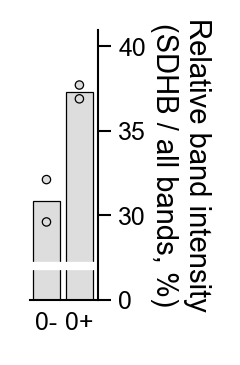

<Figure size 640x480 with 0 Axes>

In [20]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

height_ratios = [0.9]*nrow
width_ratios = [0.225]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])


sns.barplot(data=D0_data, x="Group", y="Band %",
            palette=['#DDDDDD','#DDDDDD'], saturation=1,
            width=0.8,
            errorbar=None,
            # errorbar='sd', err_kws={"linewidth": 0.5}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

sns.stripplot(data=D0_data, x="Group", y="Band %",
              palette=['#DDDDDD','#DDDDDD'],
              size=2, linewidth=0.3, edgecolor='k',
              jitter=False,
              legend=False)


ax.set_ylim(25,41)
ax.set_xlim(-0.5, 1.55)
ax.set_yticks([25,30,35,40])
ax.set_yticklabels([0,30,35,40])
ax.axhline(27, c='w', lw=2)

ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=3)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

ax.set_xlabel('', labelpad=1)
ax.set_ylabel('Relative band intensity\n(SDHB / all bands, %)', labelpad=1, rotation=-90, ha='center', va='bottom')

ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig(f'OXPHOS_band_PT-level_0d_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [21]:
from scipy import stats
display(stats.ttest_ind(D0_data[D0_data['Group']=='0-']['Band %'], D0_data[D0_data['Group']=='0+']['Band %']))

Ttest_indResult(statistic=-4.885861713799335, pvalue=0.03942970605895148)

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_79193/3852432585.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=D4_data, x="Group", y="Band %",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_79193/3852432585.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=D4_data, x="Group", y="Band %",


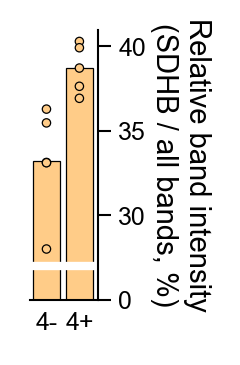

<Figure size 640x480 with 0 Axes>

In [17]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

height_ratios = [0.9]*nrow
width_ratios = [0.225]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])


sns.barplot(data=D4_data, x="Group", y="Band %",
            palette=['#FFCC88','#FFCC88'], saturation=1,
            width=0.8,
            errorbar=None,
            # errorbar='sd', err_kws={"linewidth": 0.5}, capsize=.3,
            ax=ax, linewidth = 0.3, edgecolor='k',
            legend=False)

sns.stripplot(data=D4_data, x="Group", y="Band %",
              palette=['#FFCC88','#FFCC88'],
              size=2, linewidth=0.3, edgecolor='k',
              jitter=False,
              legend=False)


ax.set_ylim(25,41)
ax.set_xlim(-0.5, 1.55)
ax.set_yticks([25,30,35,40])
ax.set_yticklabels([0,30,35,40])
ax.axhline(27, c='w', lw=2)

ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=3)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')

ax.set_xlabel('', labelpad=1)
ax.set_ylabel('Relative band intensity\n(SDHB / all bands, %)', labelpad=1, rotation=-90, ha='center', va='bottom')

ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig(f'OXPHOS_band_PT-level_4d_barplot.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [16]:
from scipy import stats
display(stats.ttest_ind(D4_data[D4_data['Group']=='4-']['Band %'], D4_data[D4_data['Group']=='4+']['Band %']))

Ttest_indResult(statistic=-3.477945706779878, pvalue=0.008344764621785043)